In [ ]:
# DHIVYA G
# airline_flight_data_analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = r"C:\Users\gdhiv\Downloads\airline_flight_data_trend_analysis.csv"
df = pd.read_csv(file_path)
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['Flight_ID', 'Airline', 'Origin_Airport', 'Destination_Airport',
       'Departure_Time', 'Arrival_Time', 'Flight_Status', 'Delay_Minutes',
       'Weather_Condition', 'Flight_Type', 'Busiest_Route',
       'Average_Delay_Domestic', 'Average_Delay_International'],
      dtype='object')


In [ ]:
#  Activity 1: Data Cleaning & Preprocessing
if 'Flight_Status' in df.columns:
    df.loc[:, 'Flight_Status'] = df['Flight_Status'].fillna('Unknown')
    print("\nMissing Flight_Status values filled with 'Unknown'")

if 'Departure_Time' in df.columns:
    df['Departure_Time'] = pd.to_datetime(df['Departure_Time'], errors='coerce')
    df['HourBin'] = df['Departure_Time'].dt.floor('h')
    print("\nDeparture times converted into hourly bins")

print("\n--- Activity 1 Output ---")
print(df[['Flight_Status', 'Departure_Time', 'HourBin']])


Missing Flight_Status values filled with 'Unknown'

Departure times converted into hourly bins

--- Activity 1 Output ---
    Flight_Status      Departure_Time             HourBin
0         Delayed 2024-01-11 01:50:00 2024-01-11 01:00:00
1         On-Time 2024-01-09 07:57:00 2024-01-09 07:00:00
2         Delayed 2024-01-12 23:58:00 2024-01-12 23:00:00
3         On-Time 2024-01-15 13:38:00 2024-01-15 13:00:00
4        Canceled 2024-01-19 06:14:00 2024-01-19 06:00:00
..            ...                 ...                 ...
995       On-Time 2024-01-01 10:34:00 2024-01-01 10:00:00
996      Canceled 2024-01-15 10:49:00 2024-01-15 10:00:00
997       Delayed 2024-01-03 16:15:00 2024-01-03 16:00:00
998       On-Time 2024-01-06 18:27:00 2024-01-06 18:00:00
999       On-Time 2024-01-10 10:17:00 2024-01-10 10:00:00

[1000 rows x 3 columns]


In [ ]:
# Activity 2: NumPy & Pandas Operations
if {'Airline', 'Delay_Minutes'}.issubset(df.columns):
    average_delay_per_airline = df.groupby('Airline')['Delay_Minutes'].mean()
    print("\nAverage Delay per Airline:")
    print(average_delay_per_airline)

    print("\n")

if {'Weather_Condition', 'Delay_Minutes'}.issubset(df.columns):
    df['Weather_Condition_Encoded'] = df['Weather_Condition'].astype('category').cat.codes
    correlation = df[['Weather_Condition_Encoded', 'Delay_Minutes']].corr()
    print("\nCorrelation between Weather and Delays:")
    print(correlation)
print("\n")
print("\n")
print("Average delay per airline and correlation displayed above.")


Average Delay per Airline:
Airline
Air India        33.940594
Emirates         27.204301
GoAir            32.473118
IndiGo           27.183486
Qatar Airways    28.864583
SpiceJet         23.180723
Vistara          38.488636
Name: Delay_Minutes, dtype: float64



Correlation between Weather and Delays:
                           Weather_Condition_Encoded  Delay_Minutes
Weather_Condition_Encoded                   1.000000      -0.042341
Delay_Minutes                              -0.042341       1.000000




Average delay per airline and correlation displayed above.


In [ ]:
#  Activity 3: Trend Analysis
if {'Origin_Airport', 'Destination_Airport'}.issubset(df.columns):
    busiest_routes = df.groupby(['Origin_Airport', 'Destination_Airport']).size().reset_index(name='FlightCount')
    busiest_routes = busiest_routes.sort_values(by='FlightCount', ascending=False).head(10)
    print("\nBusiest Flight Routes:")
    print(busiest_routes)

if 'Flight_Type' in df.columns and 'Delay_Minutes' in df.columns:
    domestic_delay = df[df['Flight_Type'] == 'Domestic']['Delay_Minutes'].mean()
    international_delay = df[df['Flight_Type'] == 'International']['Delay_Minutes'].mean()
    print(f"\nAverage Delay - Domestic Flights: {domestic_delay:.2f} minutes")
    print(f"Average Delay - International Flights: {international_delay:.2f} minutes")
print("\n")
print("Busiest routes and domestic vs international delays displayed above.")



Busiest Flight Routes:
   Origin_Airport Destination_Airport  FlightCount
14            DEL                 BLR           28
19            DEL                 MAA           25
20            DEL                 SIN           24
3             BLR                 JFK           24
49            SIN                 BLR           23
45            MAA                 DXB           23
51            SIN                 DEL           23
10            BOM                 JFK           23
17            DEL                 JFK           23
41            LHR                 SIN           23

Average Delay - Domestic Flights: 29.65 minutes
Average Delay - International Flights: 30.35 minutes


Busiest routes and domestic vs international delays displayed above.


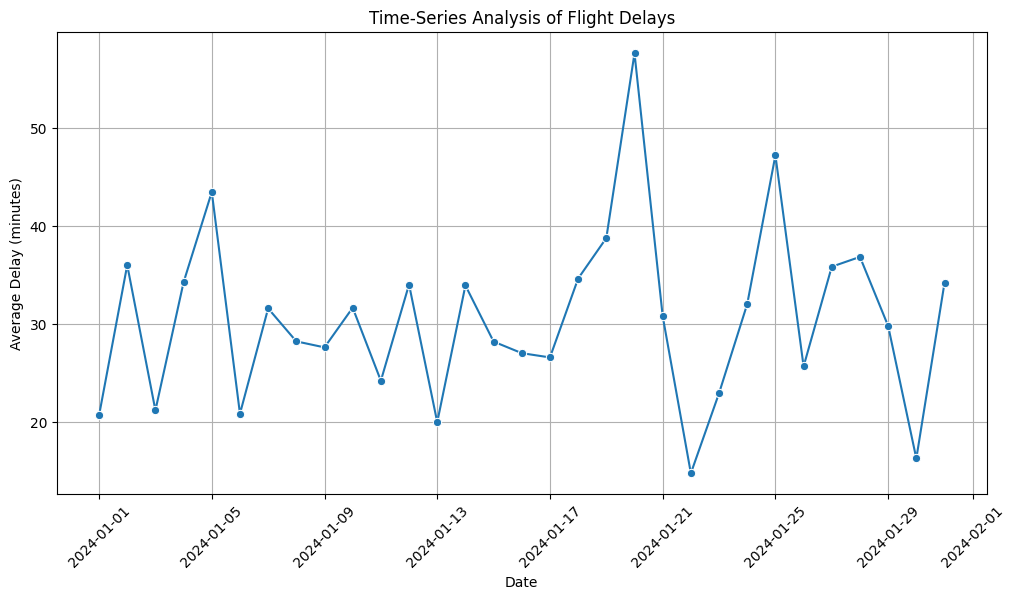


Time-Series Graph of Flight Delays displayed.








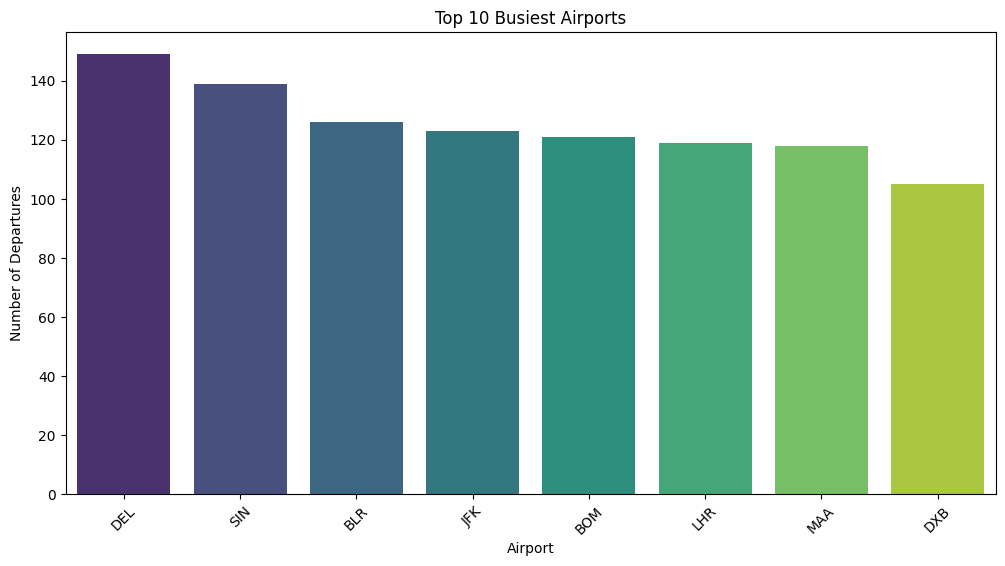


Bar chart of busiest airports displayed.


In [ ]:
#  Activity 4: Data Visualization
if {'Departure_Time', 'Delay_Minutes'}.issubset(df.columns):
    df['Date'] = df['Departure_Time'].dt.date
    time_series_delay = df.groupby('Date')['Delay_Minutes'].mean()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=time_series_delay.index, y=time_series_delay.values, marker='o', linestyle='-')
    plt.xlabel('Date')
    plt.ylabel('Average Delay (minutes)')
    plt.title('Time-Series Analysis of Flight Delays')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
    print("\nTime-Series Graph of Flight Delays displayed.")
print("\n")
print("\n")
print("\n")
# Create a bar chart of busiest airports
if 'Origin_Airport' in df.columns:
    busiest_airports = df['Origin_Airport'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=busiest_airports.index, y=busiest_airports.values, hue=busiest_airports.index, palette='viridis', legend=False)
    plt.xlabel('Airport')
    plt.ylabel('Number of Departures')
    plt.title('Top 10 Busiest Airports')
    plt.xticks(rotation=45)
    plt.show()
    print("\nBar chart of busiest airports displayed.")
